# Exercice:

La méthode actuelle de diarisation dans Pyannote utilise un système de x-vecteur basé sur le modèle spkrec-ecapa-voxceleb (cf. https://github.com/pyannote/pyannote-audio/blob/3f4a22f773209410fcd3f5c8bb13e78f49a1aedf/pyannote/audio/pipelines/speaker_diarization.py#L120).
                                                                                                                                                                                    
L’exercice consiste à tester différents modèles de x-vecteurs (ci-desous), puis à évaluer les performances de chaque modèle en termes de taux d’erreur de diarisation (DER). Le DER mesure la précision de la diarisation en prenant en compte les erreurs d’attribution de locuteur, les segments manquants et les segments supplémentaires, offrant ainsi une évaluation complète de la qualité des résultats obtenus par chaque modèle.


- https://huggingface.co/speechbrain/spkrec-resnet-voxceleb
- https://huggingface.co/speechbrain/spkrec-xvect-voxceleb
- https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb

In [ ]:
!pip install speechbrain

In [ ]:
!pip install pyannote.audio

# xvect

In [ ]:
from pyannote.audio import Pipeline

pipeline = Pipeline.from_pretrained("/content/drive/MyDrive/Traitement de la parole/TP03/config.yaml", use_auth_token="")
device = torch.device('cuda' if torch.cuda.is_available() else 'gpu')
pipeline.to(device)

hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [ ]:
output = pipeline("/content/drive/MyDrive/Traitement de la parole/TP03/ES2004a.Mix-Headset.wav")
print(output)

[ 00:00:10.898 -->  00:00:14.813] A SPEAKER_00
[ 00:00:14.880 -->  00:00:15.134] B SPEAKER_00
[ 00:00:17.867 -->  00:00:18.374] C SPEAKER_00
[ 00:00:18.812 -->  00:00:20.348] D SPEAKER_00
[ 00:00:22.322 -->  00:00:23.740] E SPEAKER_00
[ 00:00:25.124 -->  00:00:26.541] F SPEAKER_00
[ 00:00:29.072 -->  00:00:32.329] G SPEAKER_00
[ 00:00:29.798 -->  00:00:31.485] H SPEAKER_01
[ 00:00:34.219 -->  00:00:34.607] I SPEAKER_00
[ 00:00:50.639 -->  00:00:50.858] J SPEAKER_00
[ 00:00:50.942 -->  00:00:51.280] K SPEAKER_00
[ 00:01:20.474 -->  00:01:34.362] L SPEAKER_00
[ 00:01:35.560 -->  00:01:56.029] M SPEAKER_00
[ 00:01:57.565 -->  00:02:21.730] N SPEAKER_00
[ 00:02:22.759 -->  00:02:41.119] O SPEAKER_00
[ 00:02:42.098 -->  00:02:47.869] P SPEAKER_00
[ 00:02:50.367 -->  00:03:04.778] Q SPEAKER_00
[ 00:03:08.794 -->  00:03:12.895] R SPEAKER_00
[ 00:03:31.457 -->  00:03:31.896] S SPEAKER_00
[ 00:04:03.199 -->  00:04:04.364] T SPEAKER_00
[ 00:04:06.929 -->  00:04:10.692] U SPEAKER_00
[ 00:04:14.50

In [ ]:
from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()
reference = load_rttm("/content/drive/MyDrive/Traitement de la parole/TP03/ES2004a.rttm")


/usr/local/lib/python3.10/dist-packages/pyannote/database/util.py:178: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


In [ ]:
print("Keys in reference:", reference.keys())


Keys in reference: dict_keys(['ES2004a'])


In [ ]:
uri = "ES2004a"
reference_annotation = reference[uri]
der = metric(reference_annotation, output)
print(f"Diarization Error Rate (DER): {der:.2f}")

Diarization Error Rate (DER): 0.57


/usr/local/lib/python3.10/dist-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


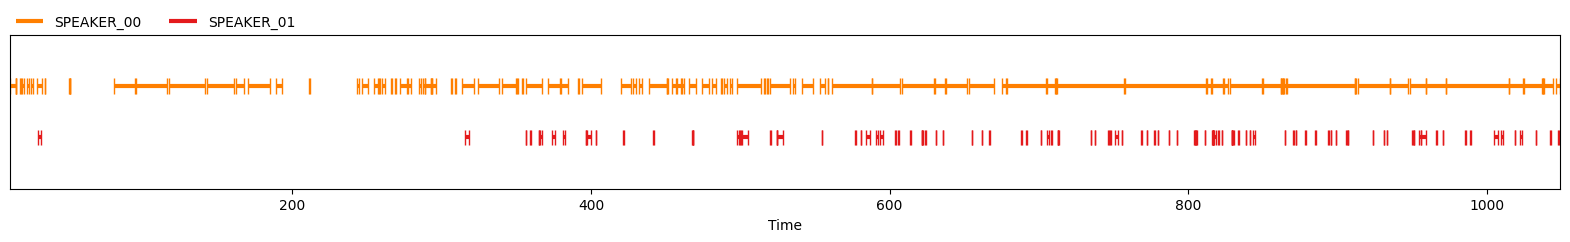

In [ ]:
output

# ecapa

In [ ]:
from pyannote.audio import Pipeline

pipeline_ecapa = Pipeline.from_pretrained("/content/drive/MyDrive/Traitement de la parole/TP03/config_2.yaml", use_auth_token="")
device = torch.device('cuda' if torch.cuda.is_available() else 'gpu')
pipeline_ecapa.to(device)

hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [ ]:
output_ecapa = pipeline_ecapa("/content/drive/MyDrive/Traitement de la parole/TP03/ES2004a.Mix-Headset.wav")
print(output_ecapa)
from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()
reference = load_rttm("/content/drive/MyDrive/Traitement de la parole/TP03/ES2004a.rttm")
uri = "ES2004a"
reference_annotation = reference[uri]
der = metric(reference_annotation, output_ecapa)
print(f"Diarization Error Rate (DER): {der:.2f}")


[ 00:00:10.898 -->  00:00:14.813] A SPEAKER_02
[ 00:00:14.880 -->  00:00:14.965] B SPEAKER_02
[ 00:00:14.965 -->  00:00:15.134] C SPEAKER_01
[ 00:00:17.867 -->  00:00:18.374] D SPEAKER_01
[ 00:00:18.812 -->  00:00:20.348] E SPEAKER_02
[ 00:00:22.322 -->  00:00:23.740] F SPEAKER_02
[ 00:00:25.124 -->  00:00:26.541] G SPEAKER_03
[ 00:00:29.072 -->  00:00:32.329] H SPEAKER_03
[ 00:00:29.798 -->  00:00:31.485] I SPEAKER_02
[ 00:00:34.219 -->  00:00:34.607] J SPEAKER_02
[ 00:00:50.639 -->  00:00:50.858] K SPEAKER_03
[ 00:00:50.942 -->  00:00:51.280] L SPEAKER_03
[ 00:01:20.474 -->  00:01:34.362] M SPEAKER_02
[ 00:01:35.560 -->  00:01:56.029] N SPEAKER_02
[ 00:01:57.565 -->  00:02:21.730] O SPEAKER_02
[ 00:02:22.759 -->  00:02:41.119] P SPEAKER_02
[ 00:02:42.098 -->  00:02:47.869] Q SPEAKER_02
[ 00:02:50.367 -->  00:03:04.778] R SPEAKER_02
[ 00:03:08.794 -->  00:03:12.895] S SPEAKER_02
[ 00:03:31.457 -->  00:03:31.896] T SPEAKER_00
[ 00:04:03.199 -->  00:04:04.364] U SPEAKER_02
[ 00:04:06.92

/usr/local/lib/python3.10/dist-packages/pyannote/database/util.py:178: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(
/usr/local/lib/python3.10/dist-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


Diarization Error Rate (DER): 0.18


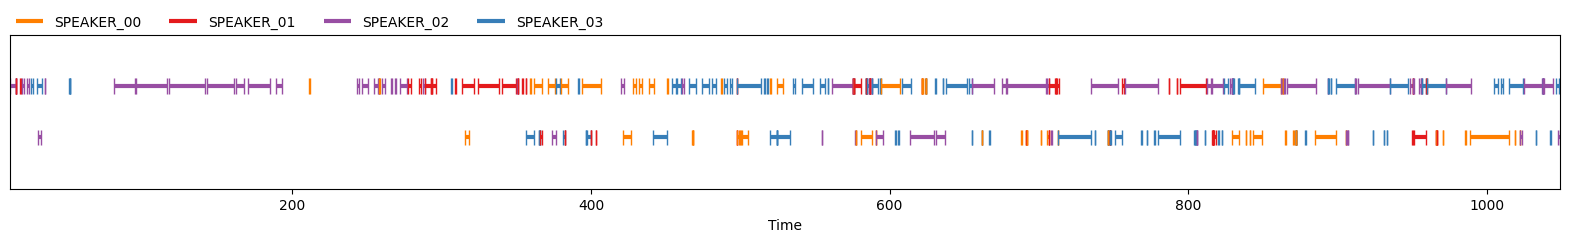

In [ ]:
output_ecapa

# resnet


In [ ]:
import torch

In [ ]:
from pyannote.audio import Pipeline

pipeline_vox = Pipeline.from_pretrained("/content/drive/MyDrive/Traitement de la parole/TP03/config_resnet.yaml", use_auth_token="")

device = torch.device('cuda' if torch.cuda.is_available() else 'gpu')
pipeline_vox.to(device)

output_vox = pipeline_vox("/content/drive/MyDrive/Traitement de la parole/TP03/ES2004a.Mix-Headset.wav")
print(output_vox)

from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()
reference = load_rttm("/content/drive/MyDrive/Traitement de la parole/TP03/ES2004a.rttm")
uri = "ES2004a"
reference_annotation = reference[uri]
der = metric(reference_annotation, output_vox)
print(f"Diarization Error Rate (DER): {der:.2f}")

/usr/local/lib/python3.10/dist-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(


[ 00:00:10.898 -->  00:00:14.813] A SPEAKER_01
[ 00:00:14.880 -->  00:00:14.965] B SPEAKER_01
[ 00:00:14.965 -->  00:00:15.134] C SPEAKER_03
[ 00:00:17.867 -->  00:00:18.374] D SPEAKER_03
[ 00:00:18.812 -->  00:00:20.348] E SPEAKER_01
[ 00:00:22.322 -->  00:00:23.740] F SPEAKER_01
[ 00:00:25.124 -->  00:00:26.541] G SPEAKER_04
[ 00:00:29.072 -->  00:00:32.329] H SPEAKER_04
[ 00:00:29.798 -->  00:00:31.485] I SPEAKER_03
[ 00:00:34.219 -->  00:00:34.607] J SPEAKER_03
[ 00:00:50.639 -->  00:00:50.757] K SPEAKER_04
[ 00:00:50.757 -->  00:00:50.774] L SPEAKER_03
[ 00:00:50.774 -->  00:00:50.858] M SPEAKER_04
[ 00:00:50.942 -->  00:00:51.027] N SPEAKER_04
[ 00:00:51.027 -->  00:00:51.263] O SPEAKER_03
[ 00:00:51.263 -->  00:00:51.280] P SPEAKER_04
[ 00:01:20.474 -->  00:01:34.362] Q SPEAKER_01
[ 00:01:35.560 -->  00:01:56.029] R SPEAKER_01
[ 00:01:57.565 -->  00:02:21.730] S SPEAKER_01
[ 00:02:22.759 -->  00:02:41.119] T SPEAKER_01
[ 00:02:42.098 -->  00:02:47.869] U SPEAKER_01
[ 00:02:50.36

/usr/local/lib/python3.10/dist-packages/pyannote/database/util.py:178: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(
/usr/local/lib/python3.10/dist-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


Diarization Error Rate (DER): 0.21


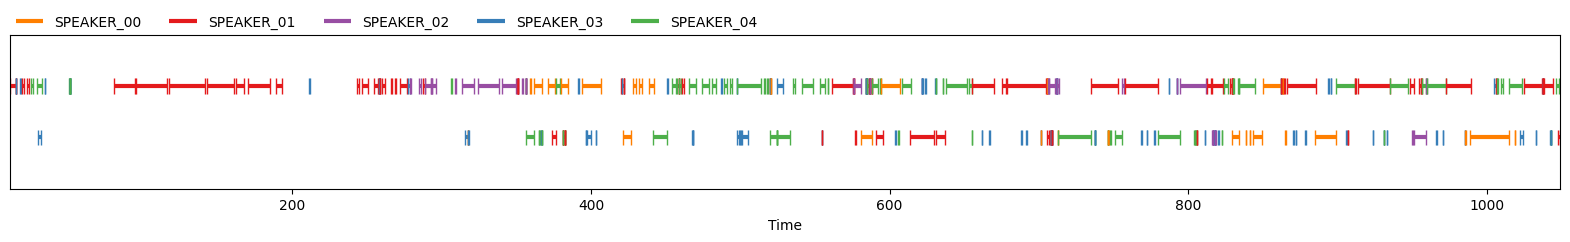

In [ ]:
output_vox

# Analyse des résultats :



-  Le modèle speechbrain/spkrec-xvect-voxceleb a obtenu un DER élevé de 0.57, ce qui indique qu'il a eu du mal à distinguer correctement les locuteurs ou qu'il y a eu beaucoup de confusions, omissions ou faux positifs dans la diarisation.
-  Le modèle speechbrain/spkrec-ecapa-voxceleb a le meilleur score avec un DER de 0.18, suggérant une performance nettement supérieure dans la tâche de diarisation.
-  Le modèle speechbrain/spkrec-resnet-voxceleb a également montré de bonnes performances avec un DER de 0.21, légèrement moins performant que ECAPA mais toujours bien meilleur que x-vector.

**Explication des différences** :

-  Les x-vectors sont une technologie plus ancienne et moins performante pour les tâches de séparation des locuteurs, ce qui peut expliquer le DER élevé.
-  Le modèle ECAPA est une architecture plus récente et optimisée pour capturer des caractéristiques discriminantes des locuteurs, d'où son DER plus bas.
-  Le modèle ResNet est aussi performant grâce à sa capacité à extraire des embeddings riches et robustes, mais il est légèrement en retrait par rapport à ECAPA, probablement en raison de différences dans l'optimisation pour ce type de tâche.